<a href="https://colab.research.google.com/github/marielnr/Magic/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:
Dua, D. and Graff, C. (2019) https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols= ['fLength','fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha', 'fDist','Class']
df=pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['Class']=(df['Class']=='g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  Class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

Classification: predict descrete categorical variable. In this example, predict if it will be g or h.
Hemos puesto f antes del nombre de cada columna porque estos son features. Seran pasados a nuestro modelo para que prediga el label que en este caso es class

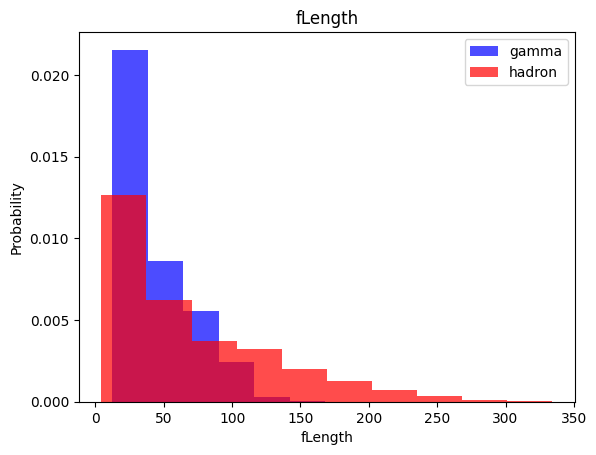

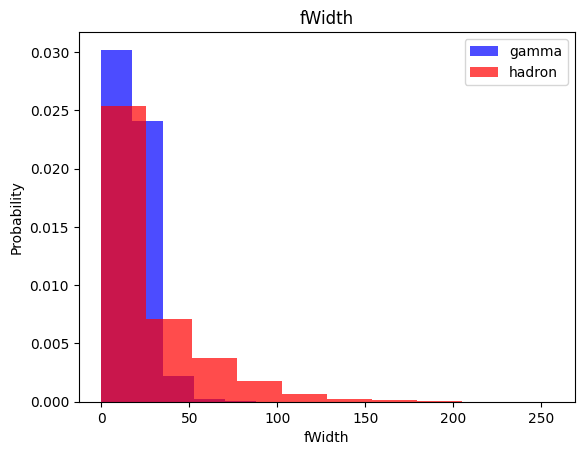

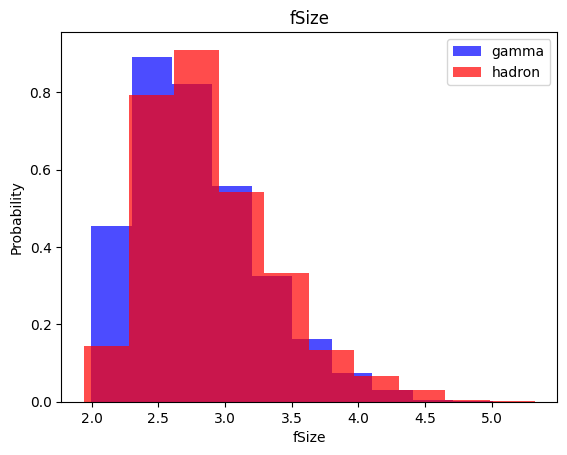

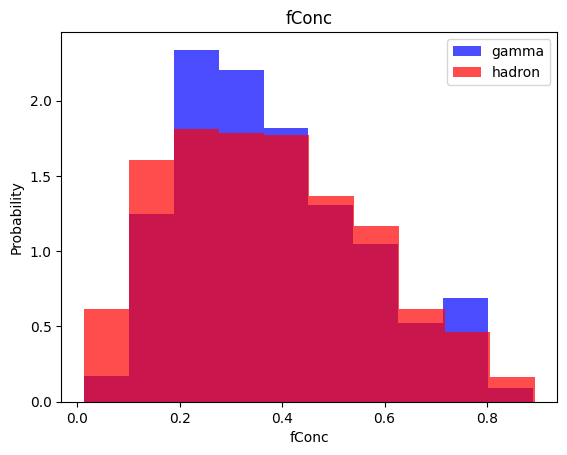

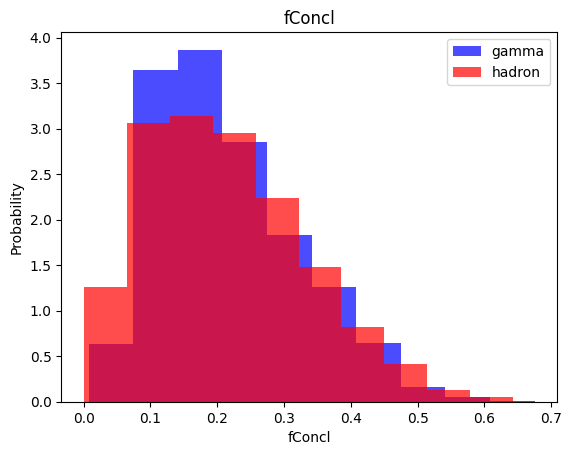

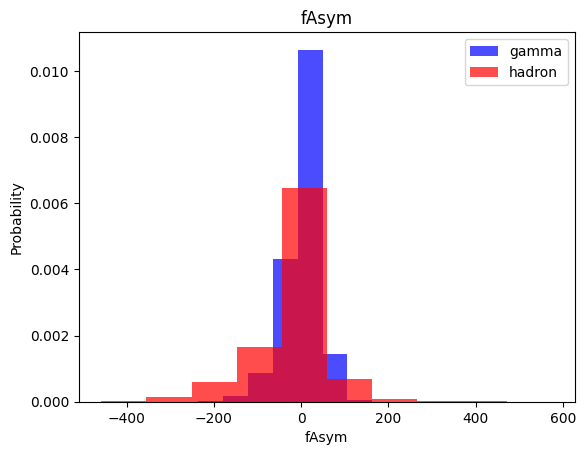

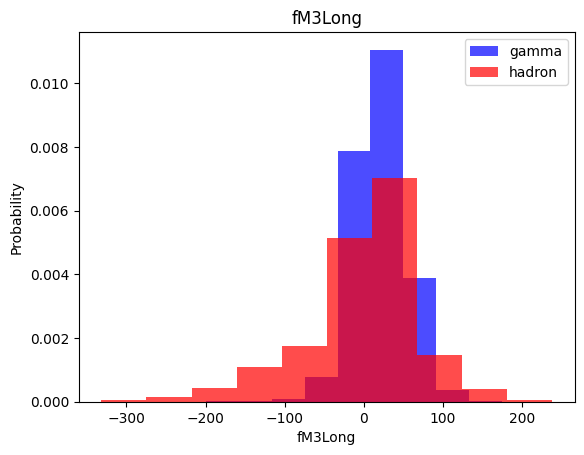

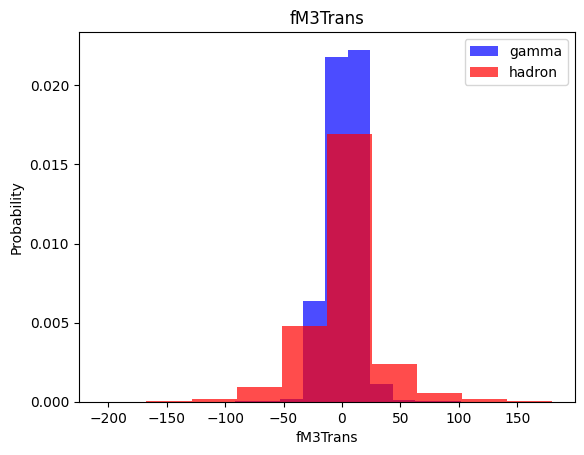

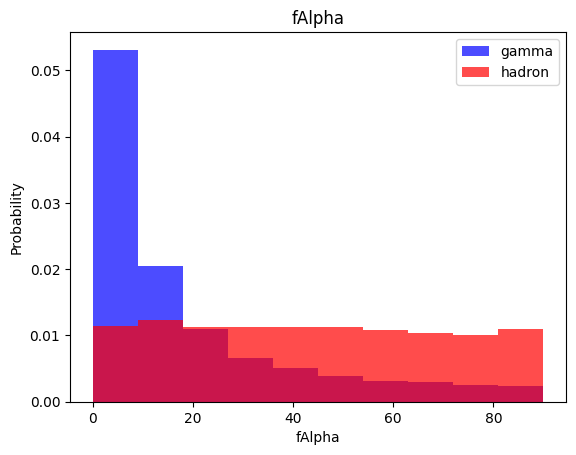

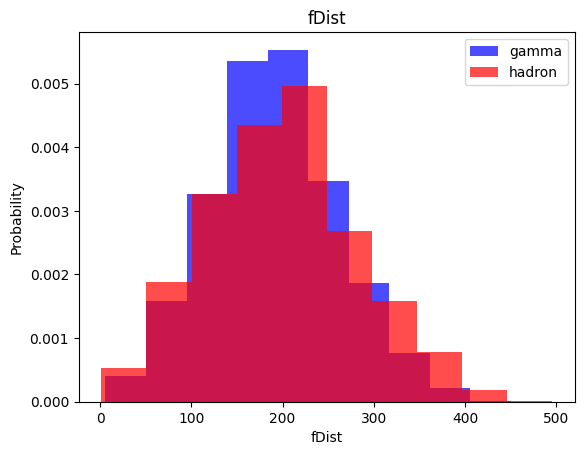

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['Class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

Abajo s emuestra como dividir un data frame, el codigo quiere decir que a train se ira del 0-60% y a validation se ira del 60-80% y del 80%-100% ser ira al test

In [5]:
train, valid, test =np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(df, oversample=False):
  x=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values

  scaler= StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  #np.hstack:take an array and another array and horizontally stack them together
  #np.reshape: givrs a new chape to an array without changing its data
  data=np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

As you can see the difference is a lot, we need to have a more equal count for ML to work. Por eso arriba se agrega el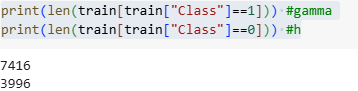

In [7]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)
test, x_test, y_test= scale_dataset(test, oversample=False)

#kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [10]:
y_pred=knn_model.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1311
           1       0.88      0.85      0.86      2493

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [14]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1311
           1       0.74      0.89      0.81      2493

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



#Log Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model= LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [17]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1311
           1       0.85      0.82      0.84      2493

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

In [20]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1311
           1       0.89      0.90      0.90      2493

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [21]:
import tensorflow as tf

In [22]:
def plot_history(history):
  fig, (ax1,ax2) =plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_ylabel('Binary crossentropy')
  ax1.set_xlabel('Epoch')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.grid(True)

  plt.show()

In [23]:
def plot_history(history):
  fig, (ax1,ax2) =plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_ylabel('Binary crossentropy')
  ax1.set_xlabel('Epoch')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.grid(True)

  plt.show()

In [24]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  #now lets train it
  history=nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


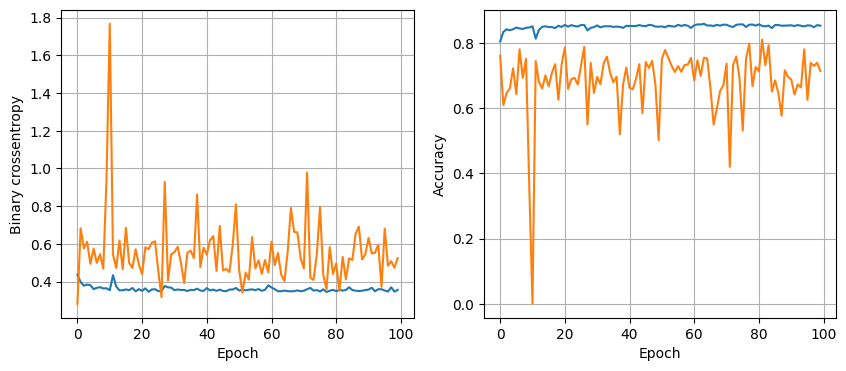

16 nodes, dropout 0, lr 0.1, batch size 64


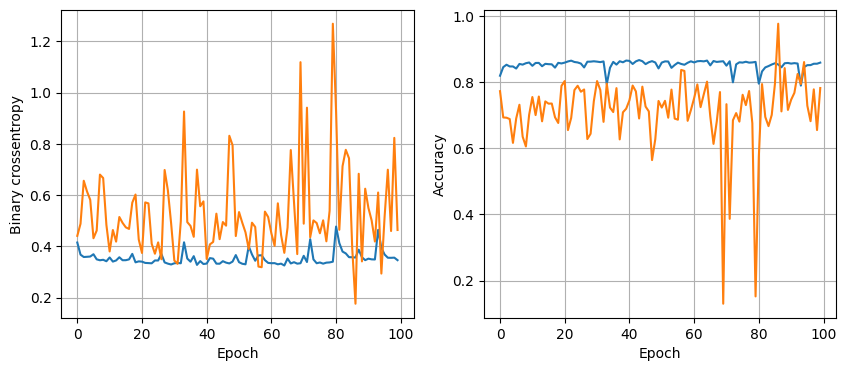

16 nodes, dropout 0, lr 0.1, batch size 128


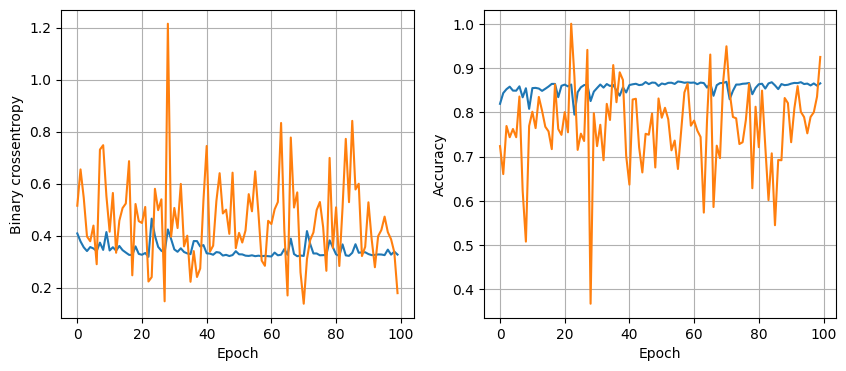

16 nodes, dropout 0, lr 0.005, batch size 32


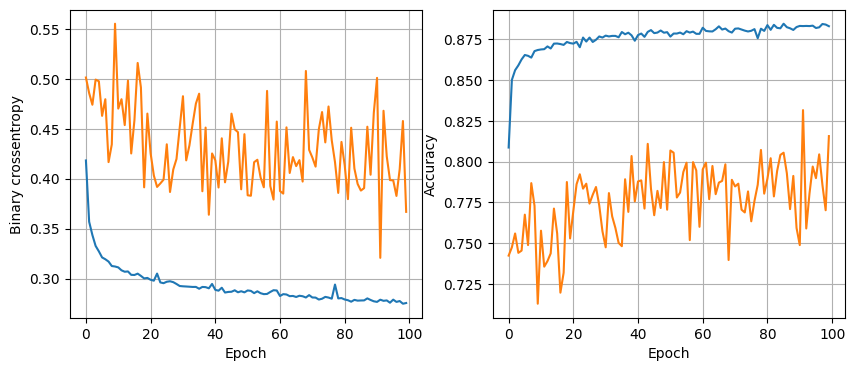

16 nodes, dropout 0, lr 0.005, batch size 64


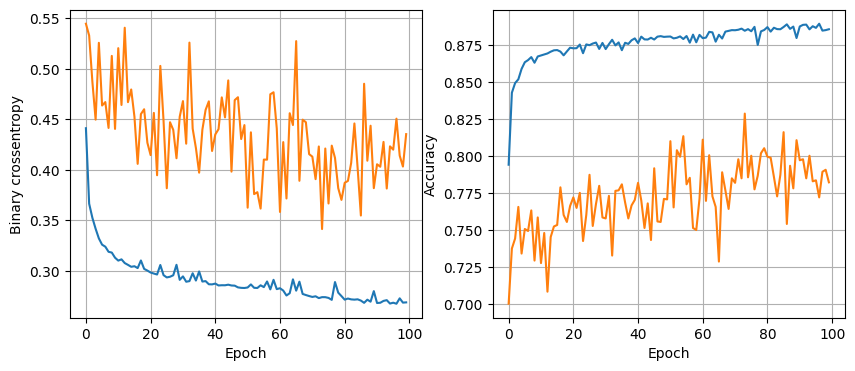

16 nodes, dropout 0, lr 0.005, batch size 128


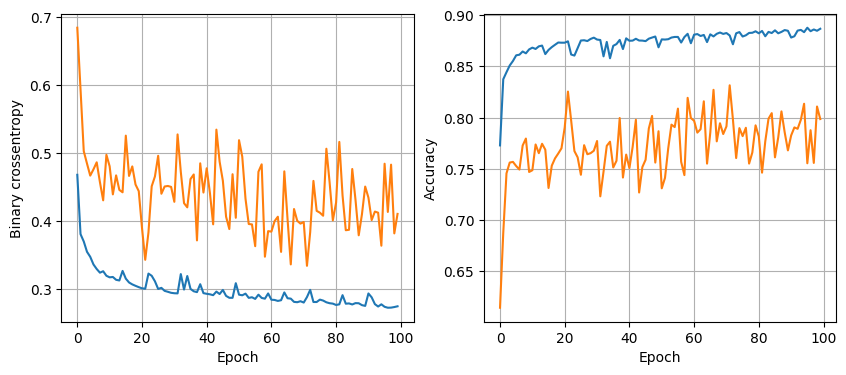

16 nodes, dropout 0, lr 0.001, batch size 32


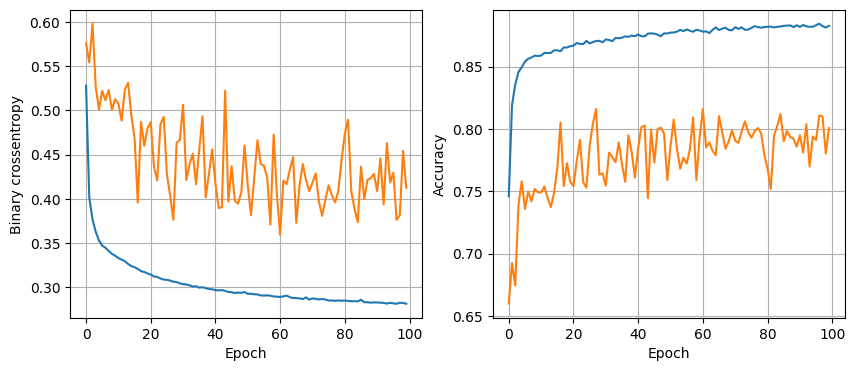

16 nodes, dropout 0, lr 0.001, batch size 64


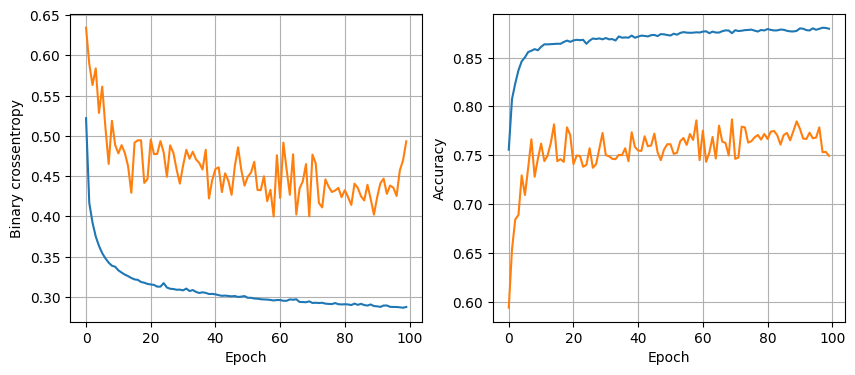

16 nodes, dropout 0, lr 0.001, batch size 128


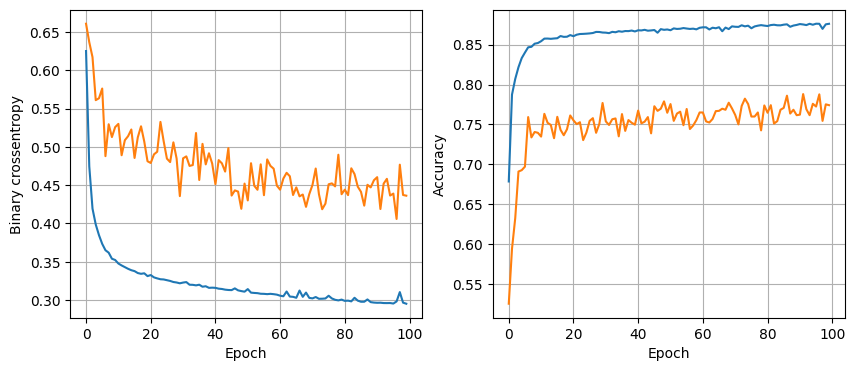

16 nodes, dropout 0.2, lr 0.1, batch size 32


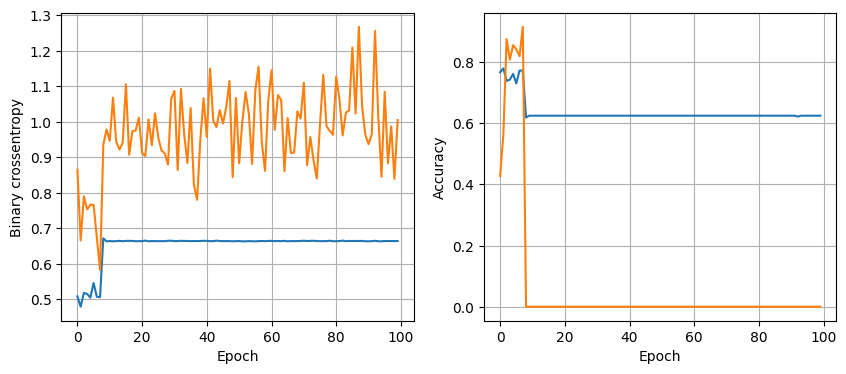

16 nodes, dropout 0.2, lr 0.1, batch size 64


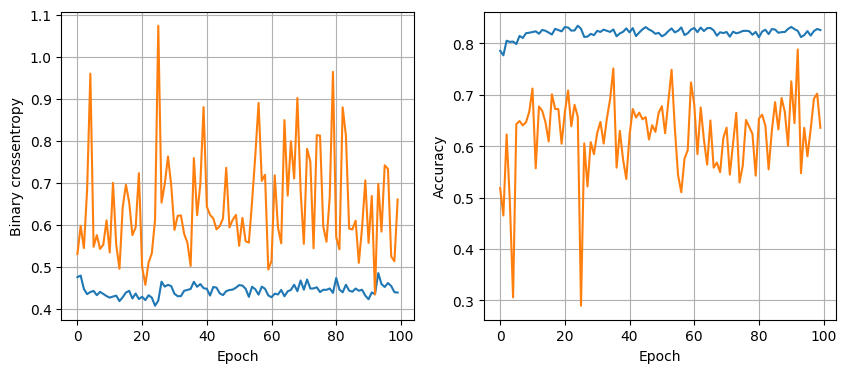

16 nodes, dropout 0.2, lr 0.1, batch size 128


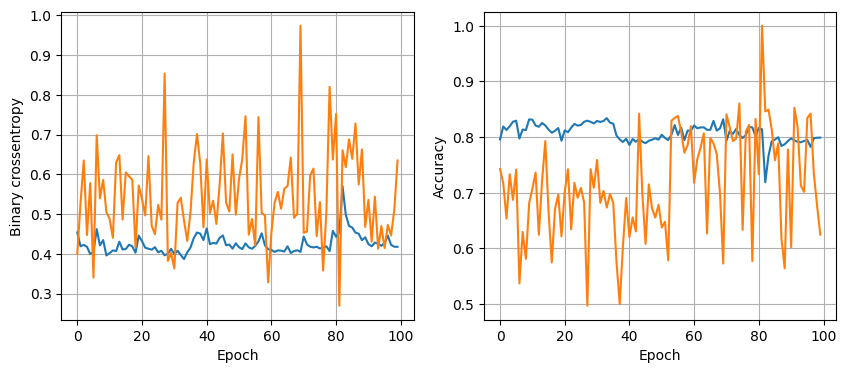

16 nodes, dropout 0.2, lr 0.005, batch size 32


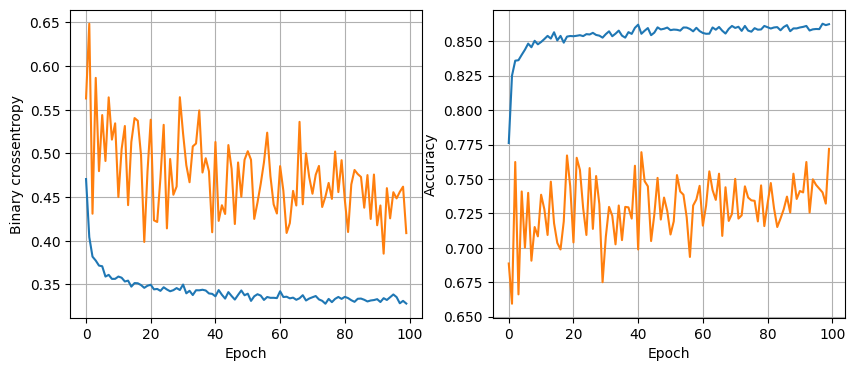

16 nodes, dropout 0.2, lr 0.005, batch size 64


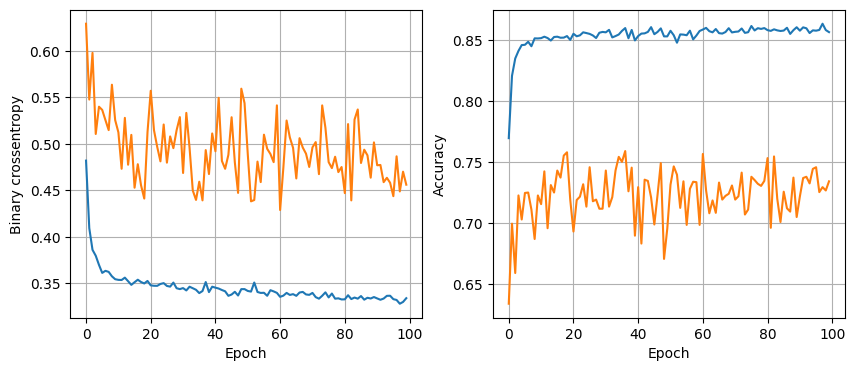

16 nodes, dropout 0.2, lr 0.005, batch size 128


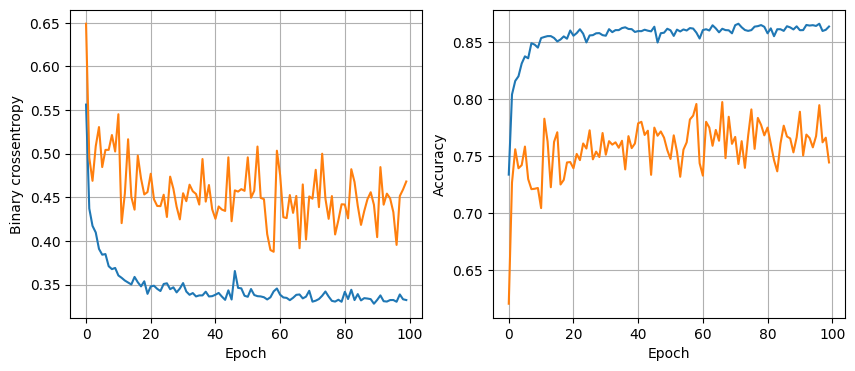

16 nodes, dropout 0.2, lr 0.001, batch size 32


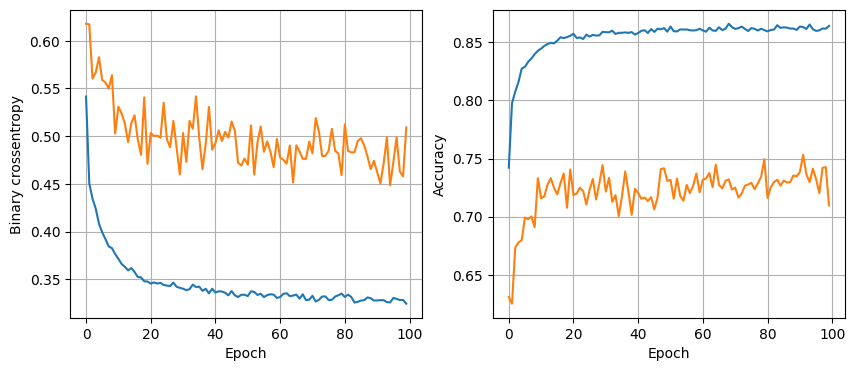

16 nodes, dropout 0.2, lr 0.001, batch size 64


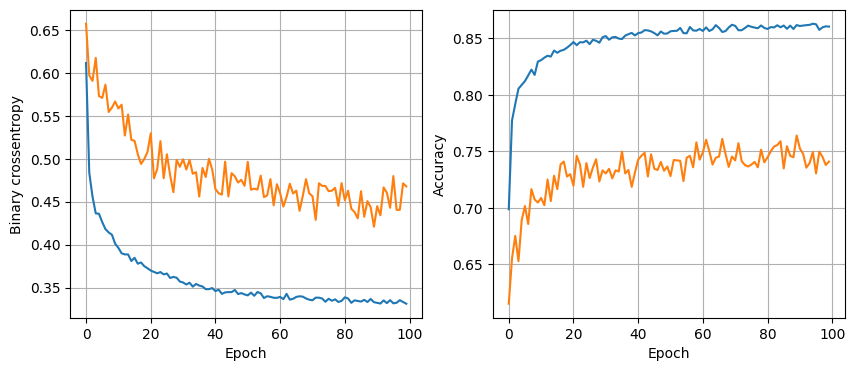

16 nodes, dropout 0.2, lr 0.001, batch size 128


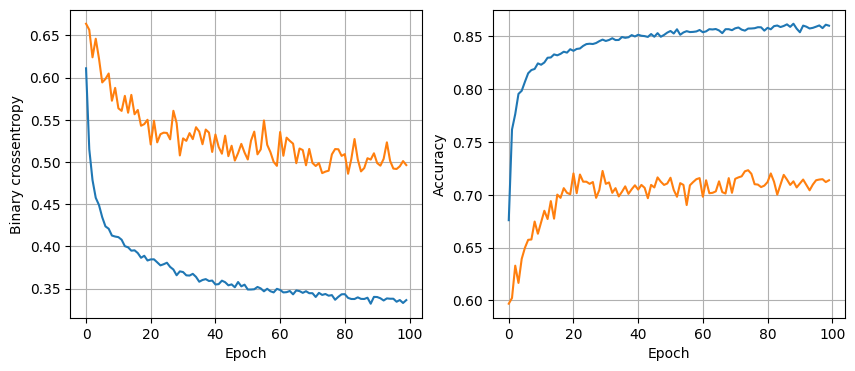

32 nodes, dropout 0, lr 0.1, batch size 32


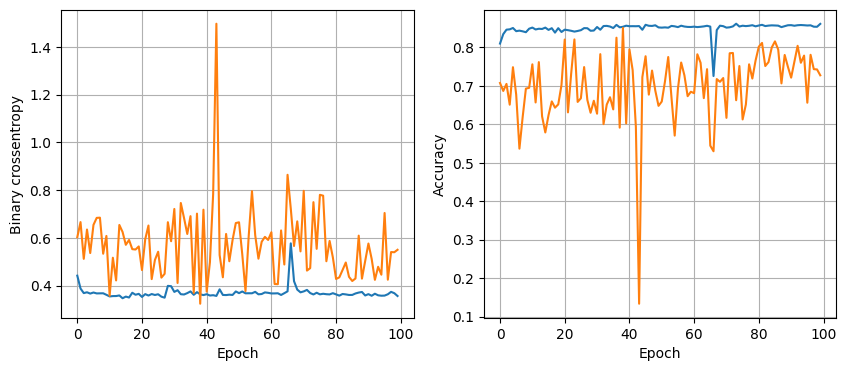

32 nodes, dropout 0, lr 0.1, batch size 64


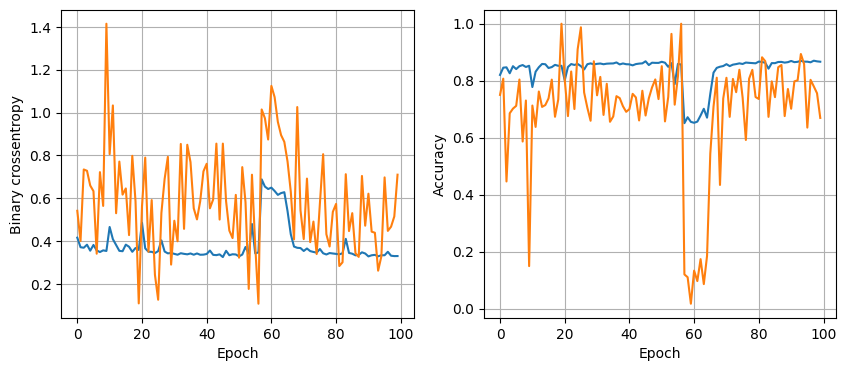

32 nodes, dropout 0, lr 0.1, batch size 128


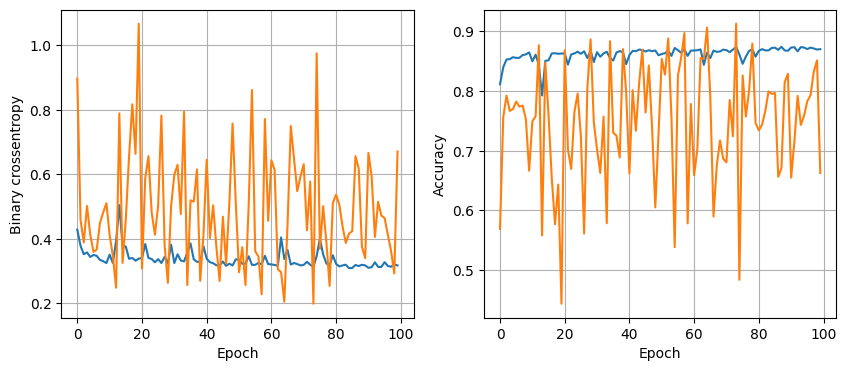

32 nodes, dropout 0, lr 0.005, batch size 32


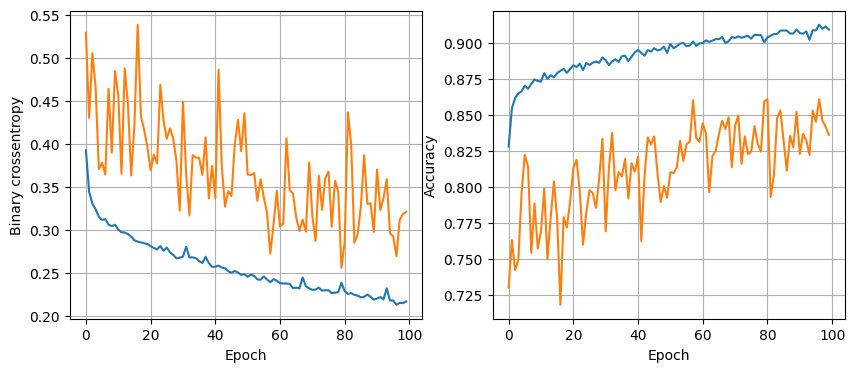

32 nodes, dropout 0, lr 0.005, batch size 64


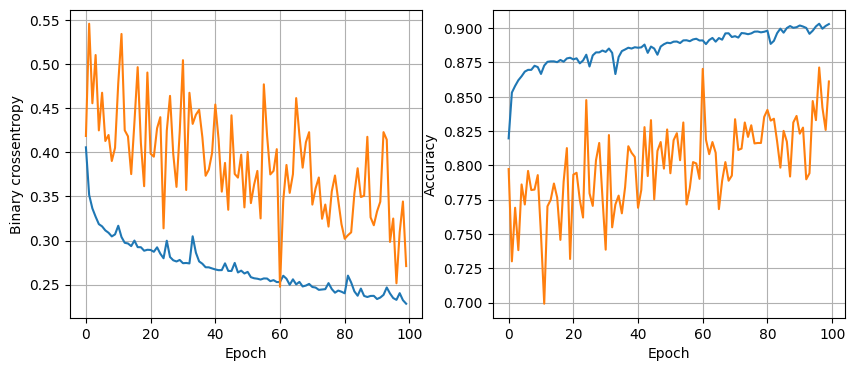

32 nodes, dropout 0, lr 0.005, batch size 128


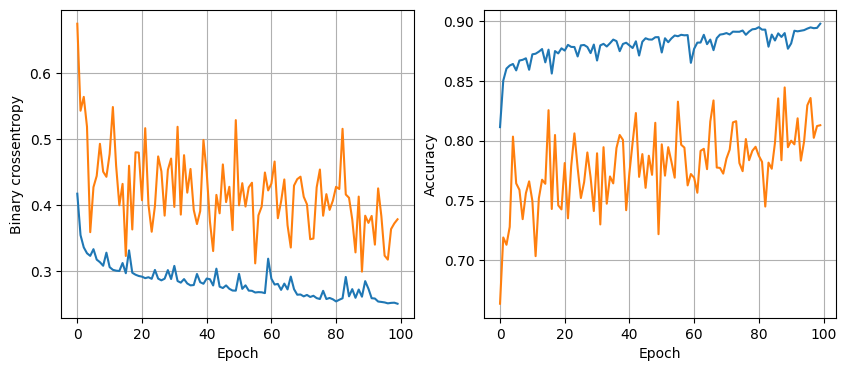

32 nodes, dropout 0, lr 0.001, batch size 32


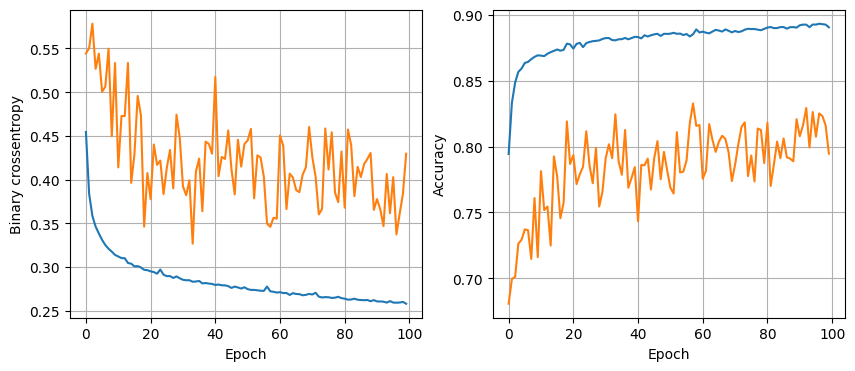

32 nodes, dropout 0, lr 0.001, batch size 64


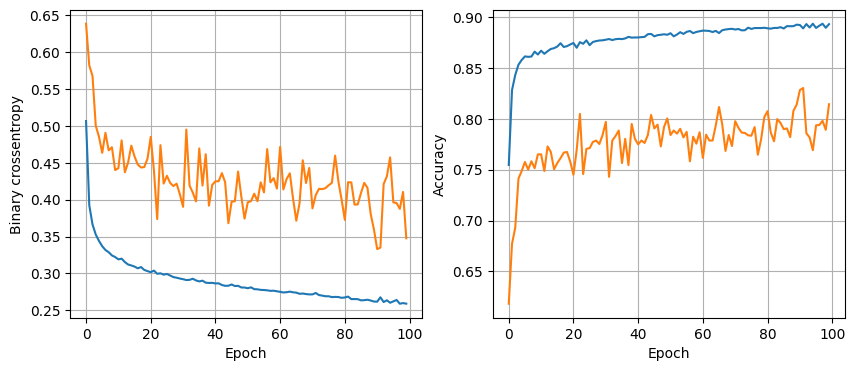

32 nodes, dropout 0, lr 0.001, batch size 128


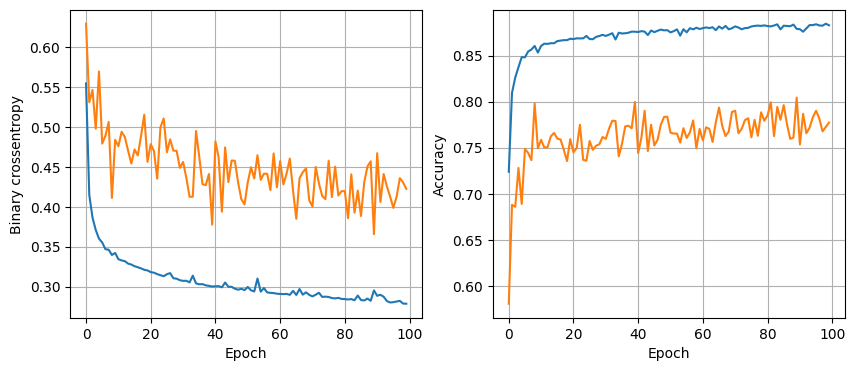

32 nodes, dropout 0.2, lr 0.1, batch size 32


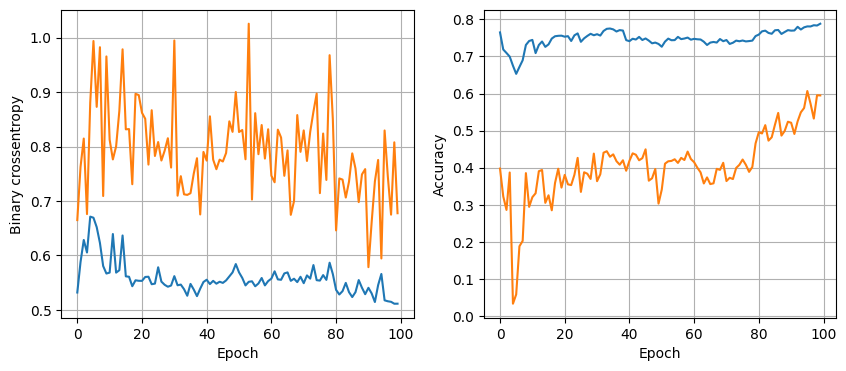

32 nodes, dropout 0.2, lr 0.1, batch size 64


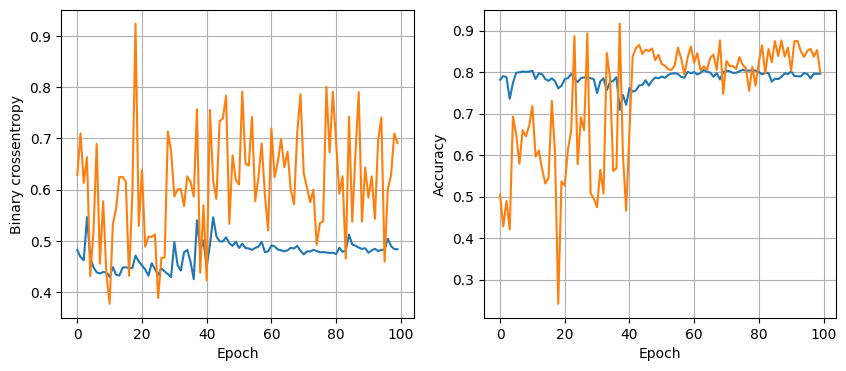

32 nodes, dropout 0.2, lr 0.1, batch size 128


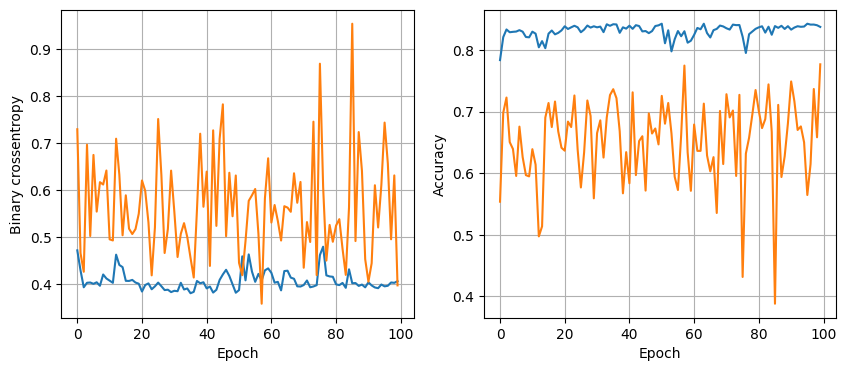

32 nodes, dropout 0.2, lr 0.005, batch size 32


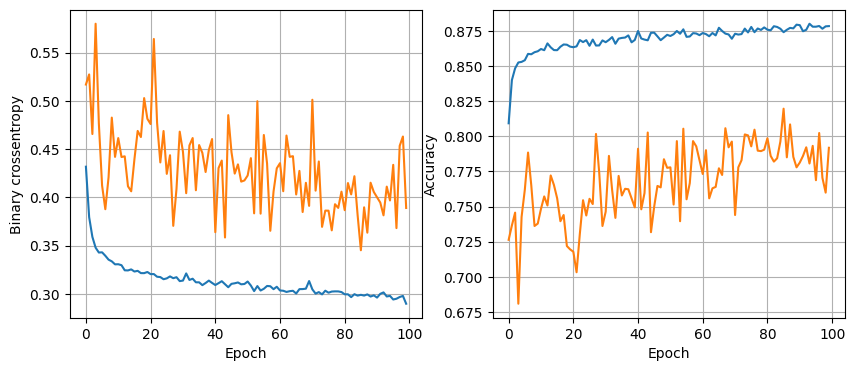

32 nodes, dropout 0.2, lr 0.005, batch size 64


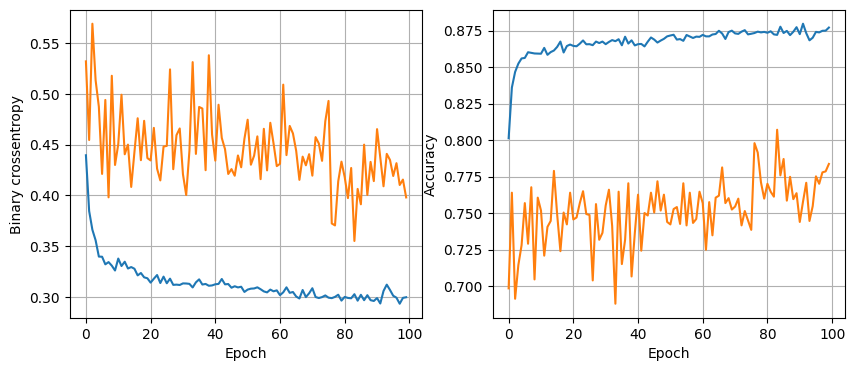

32 nodes, dropout 0.2, lr 0.005, batch size 128


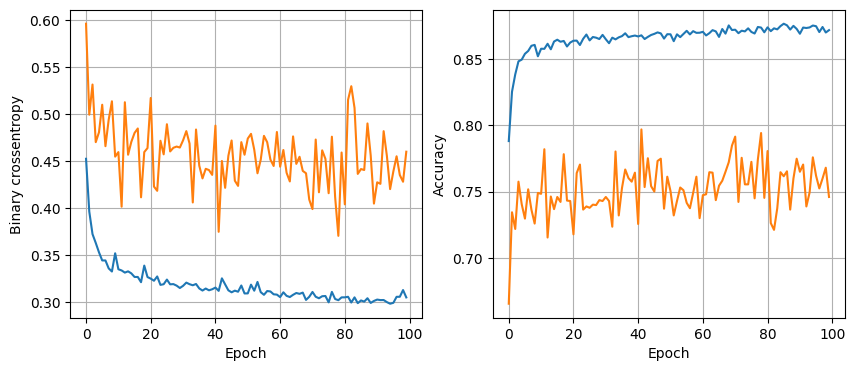

32 nodes, dropout 0.2, lr 0.001, batch size 32


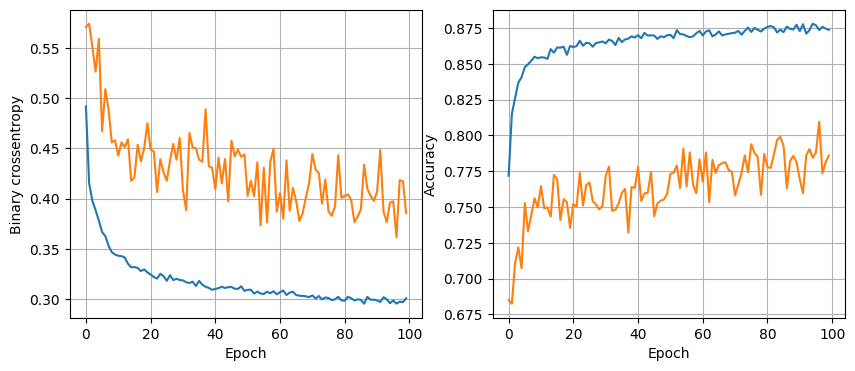

32 nodes, dropout 0.2, lr 0.001, batch size 64


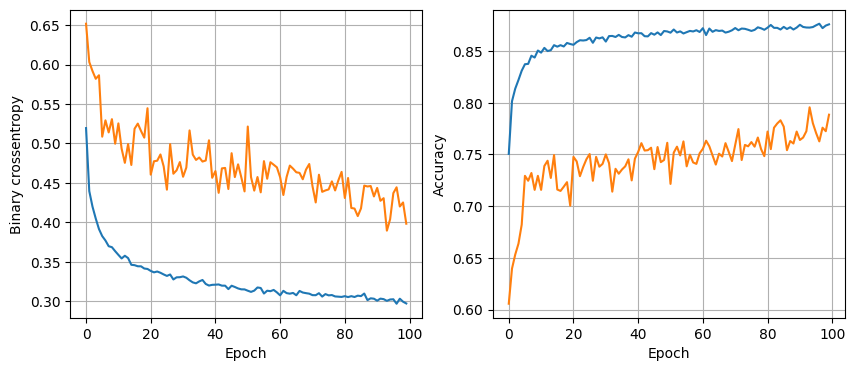

32 nodes, dropout 0.2, lr 0.001, batch size 128


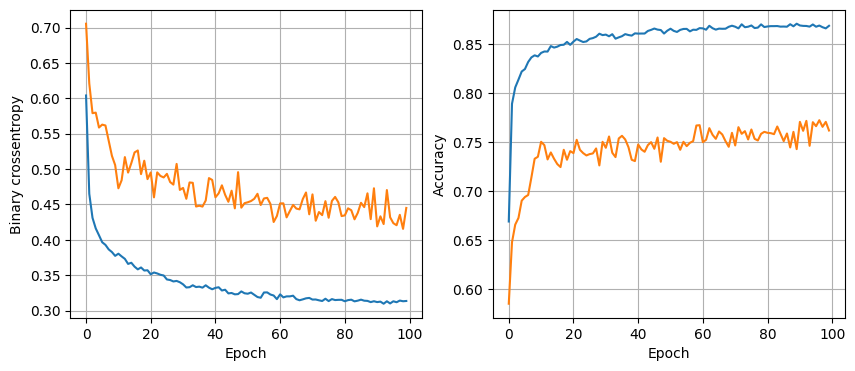

64 nodes, dropout 0, lr 0.1, batch size 32


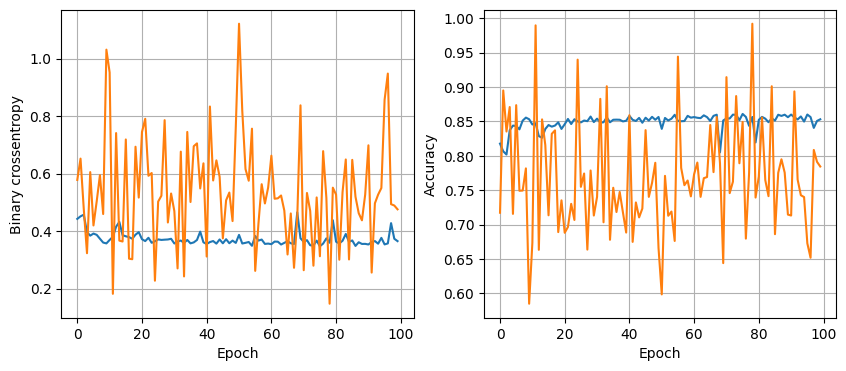

64 nodes, dropout 0, lr 0.1, batch size 64


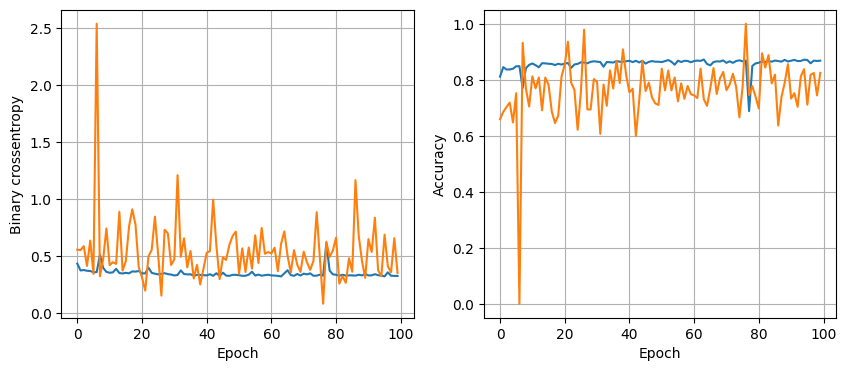

64 nodes, dropout 0, lr 0.1, batch size 128


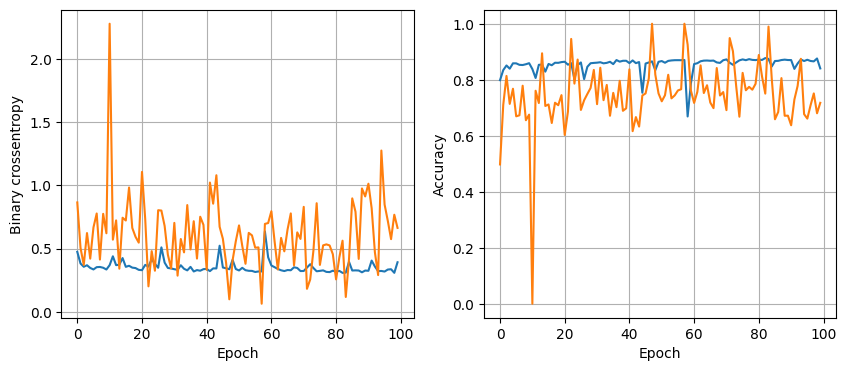

64 nodes, dropout 0, lr 0.005, batch size 32


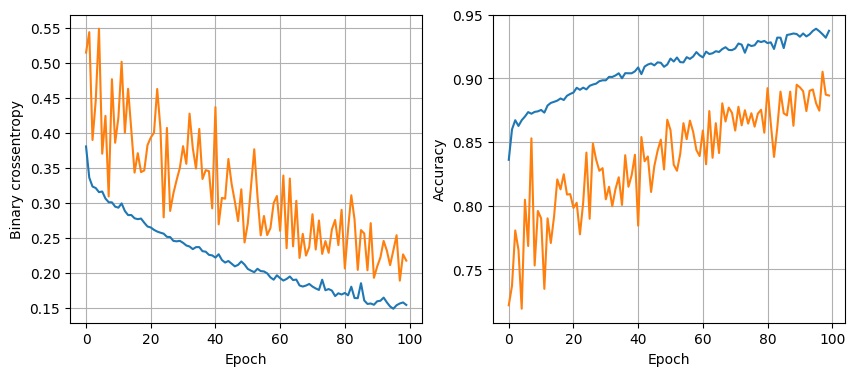

64 nodes, dropout 0, lr 0.005, batch size 64


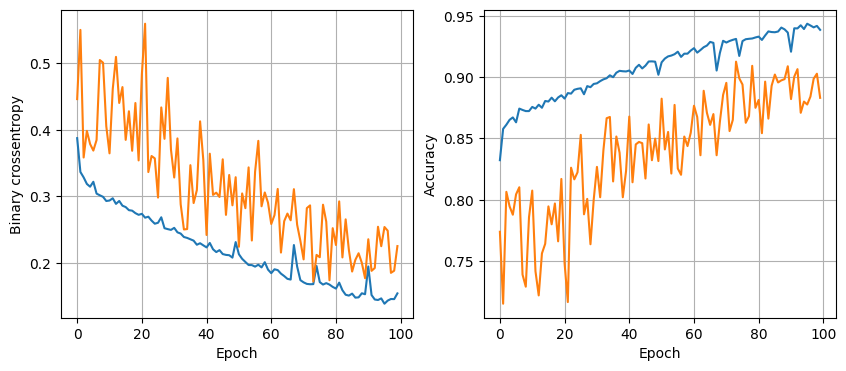

64 nodes, dropout 0, lr 0.005, batch size 128


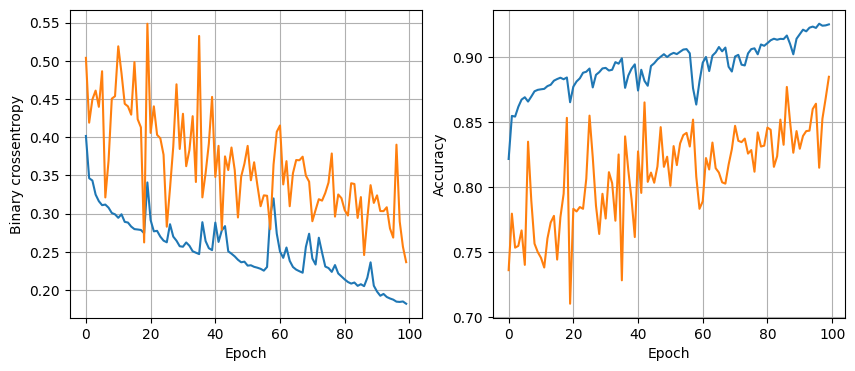

64 nodes, dropout 0, lr 0.001, batch size 32


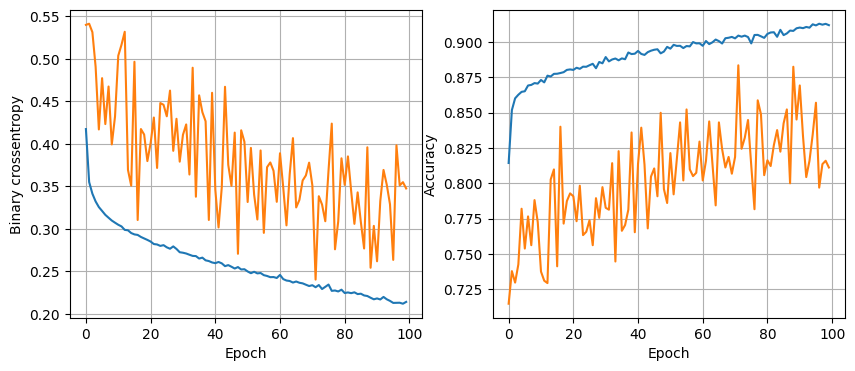

64 nodes, dropout 0, lr 0.001, batch size 64


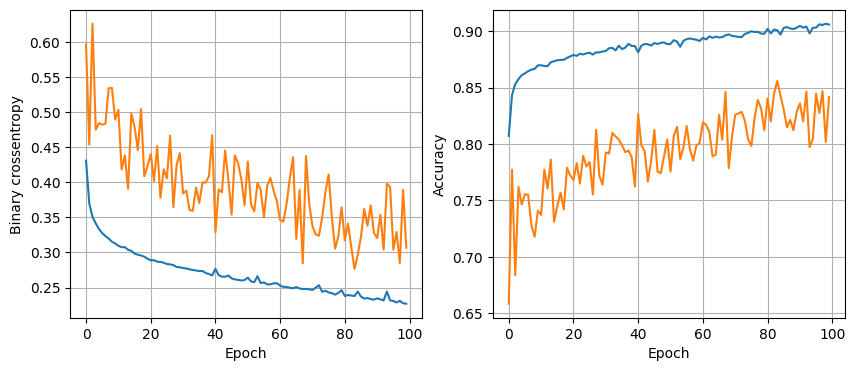

64 nodes, dropout 0, lr 0.001, batch size 128


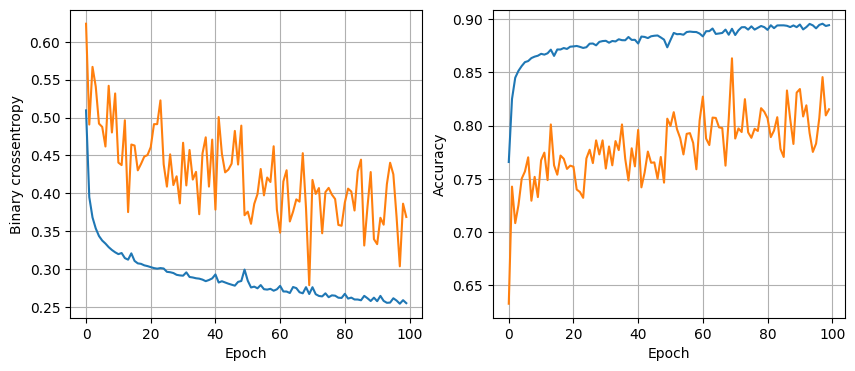

64 nodes, dropout 0.2, lr 0.1, batch size 32


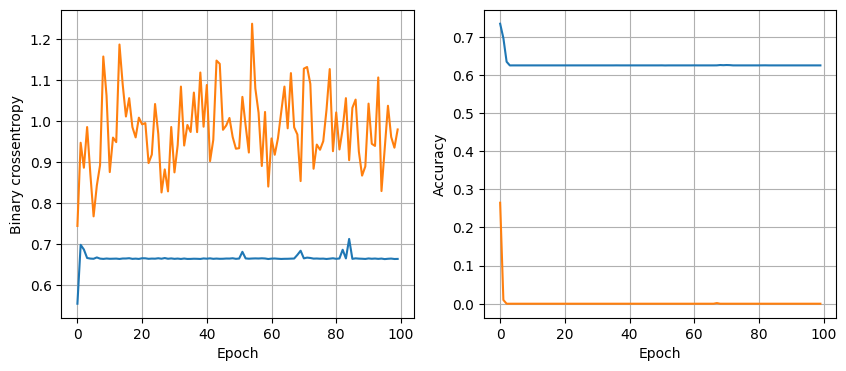

64 nodes, dropout 0.2, lr 0.1, batch size 64


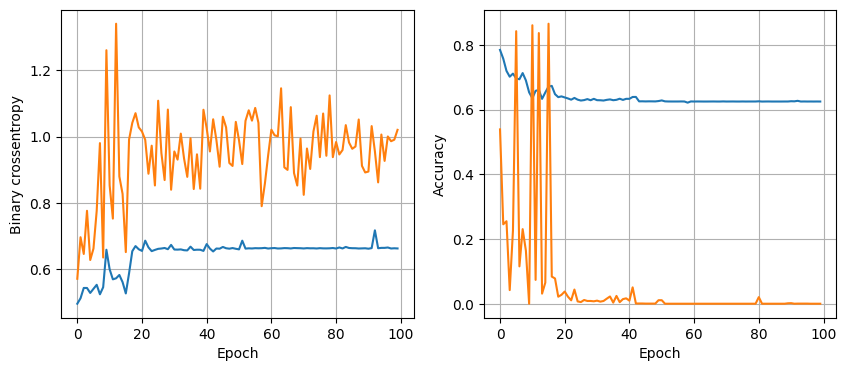

64 nodes, dropout 0.2, lr 0.1, batch size 128


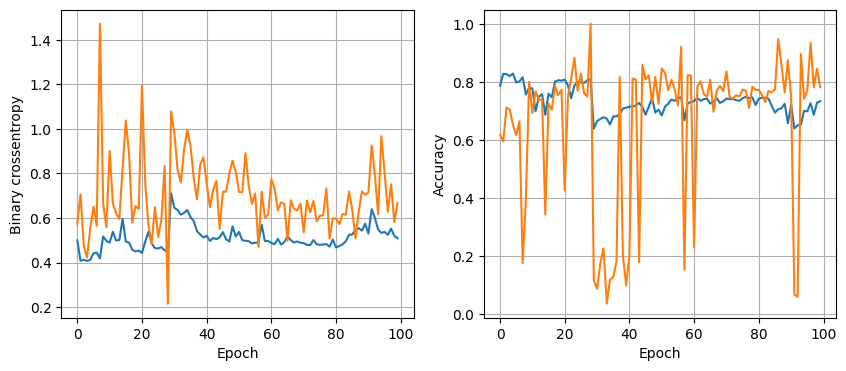

64 nodes, dropout 0.2, lr 0.005, batch size 32


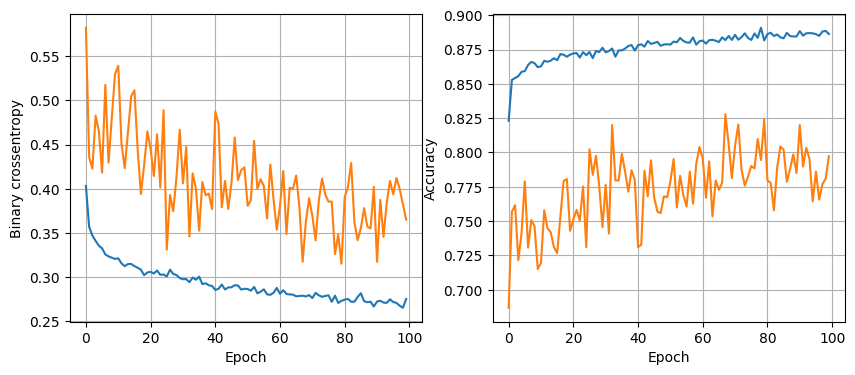

64 nodes, dropout 0.2, lr 0.005, batch size 64


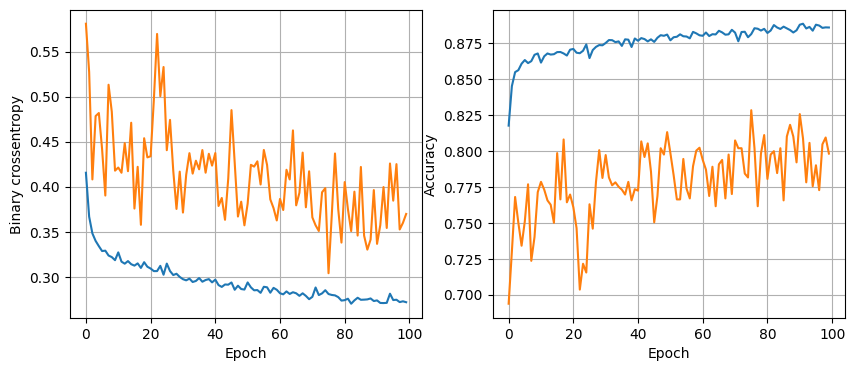

64 nodes, dropout 0.2, lr 0.005, batch size 128


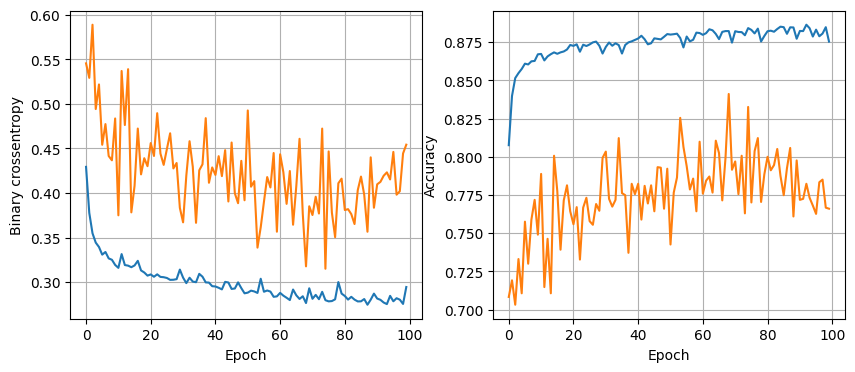

64 nodes, dropout 0.2, lr 0.001, batch size 32


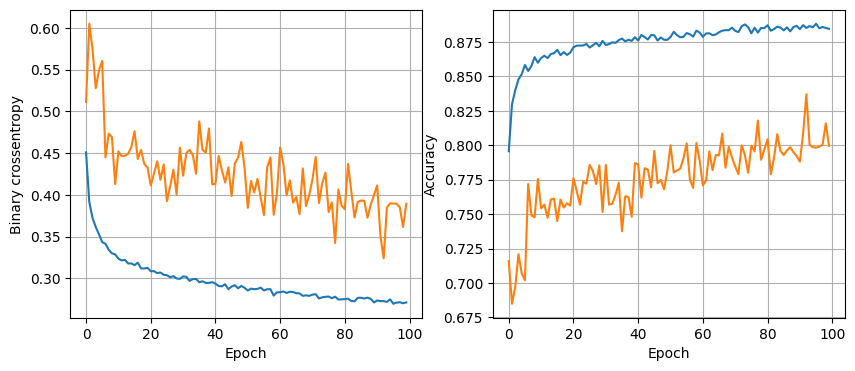

64 nodes, dropout 0.2, lr 0.001, batch size 64


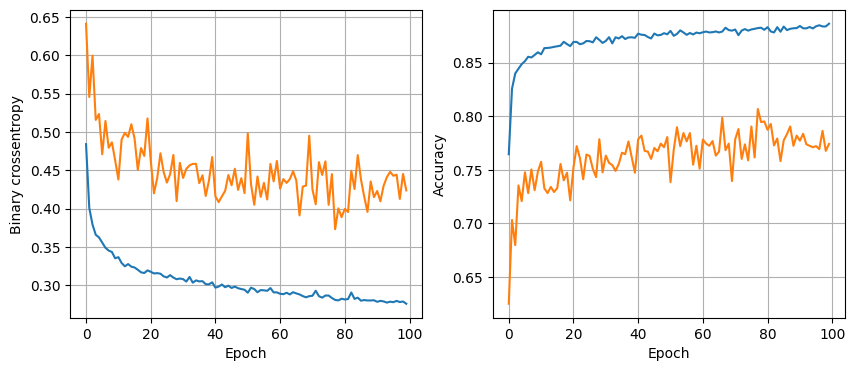

64 nodes, dropout 0.2, lr 0.001, batch size 128


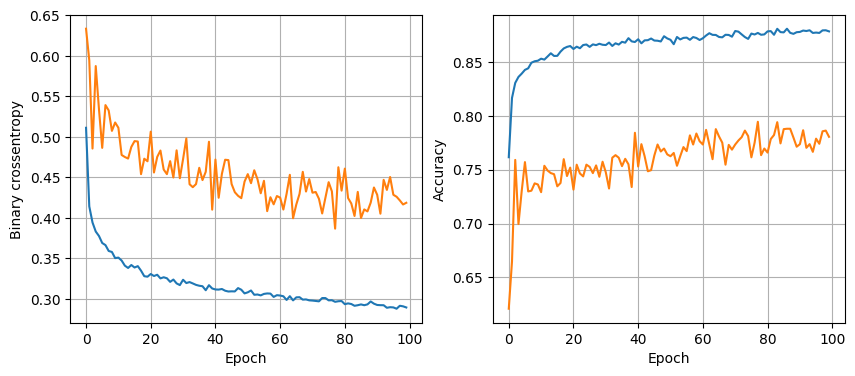

In [25]:
least_val_loss= float ('inf')
least_loss_model=None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history=train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0]  # [0] to get loss value
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
          #least_loss_model es el modelo



In [26]:
y_pred=least_loss_model.predict(x_test)
#reshape es para hacerlo una columna
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1311
           1       0.87      0.95      0.91      2493

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

